# Fraud Detection using Random Forest 

In [1]:
# Random forest adalah metode klasifikasi yg terdiri dri bbrp decision tree
# di berbagai subset dri dataset dan mengambil rata2 
# utk meningkatkan akurasi prediksi dri dataset tsb
# random forest mengambil prediksi dri setiap pohon selanjutnya 
# berdasarkan suara mayoritas prediksi memprediksi dri keputusan akhir

In [2]:
# link yt about random forest: https://www.youtube.com/watch?v=wH3C0Prd8Ec

# import library

In [3]:
# import library dlu yeah
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA


In [5]:
# baca dataset
data = pd.read_csv('/content/drive/MyDrive/2008107010053/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# untuk ngecek jumlah data transaksi valid dan non-valid
print("Valid transaction", len(data[data['Class']==0]))
print("Invalid transaction", len(data[data['Class']==1]))

Valid transaction 284315
Invalid transaction 492


In [10]:
# buat perbandingan jumlah data transaksi normal dan fraud
class_plot= pd.Series({'Fraud': len(data[data['Class']==1]), 'Valid': len(data[data['Class']==0])})
class_plot

Fraud       492
Valid    284315
dtype: int64

<AxesSubplot:>

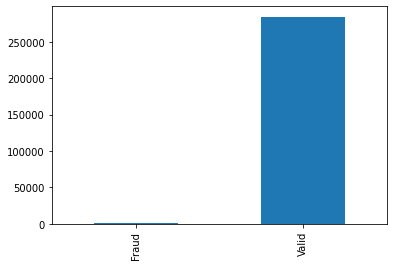

In [11]:
class_plot.plot(kind='bar')

<AxesSubplot:>

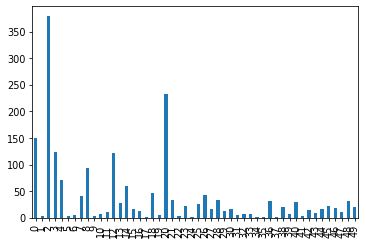

In [38]:
# lihat jumlah transaksi dlm bentuk barchart
amount = data['Amount'][:50]

amount.plot(kind='bar')

<AxesSubplot:>

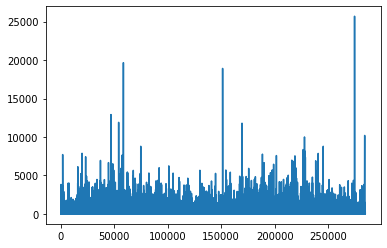

In [13]:
# lihat jumlah transaksi dlm bentuk linechart
amount = data['Amount']
amount[:50]

amount.plot(kind='line')

# fiture selection

In [14]:
# pemisahan dataset pada x dan y
# y merupakan labelnya, yaitu Class
# x merupakan fitur-fitur selain Class
y = data['Class']
x = data.drop(columns=['Class'], axis=1)

# Split Data

In [15]:
# split dataset train 70 test 30
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

#train model

## Random Forest

In [16]:
# kita gunakan random forest model
classifier = RandomForestClassifier()

### Random Forest (20 Tree)

In [39]:
#model_1
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', max_depth=10, random_state=0)
classifier.fit(x_train,y_train)
# keterangan parameter:
# n_estimators -> banyak pohon dlm hutan (banyak tree yang ingin dibuat )
# criterion    -> ukur kualitas split, ada gini ada entropi, gini utk ketidakmurnian, entropi untuk perolehan info
# max_depth    -> kedalaman max pohon
# random_state -> agar setiap model yg dirun, datanya tidak berubah bahkan akurasinya tidak berubah2 (fungsi utamaa : ngerandom data)


# criterion = 'entropy' agar data hasil pembagiannya bersifat homogen
# semakin homogen pembagian cabang dari induknya, maka semakin baik akurasinya. 

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]

score matrics 0.9995201479348805


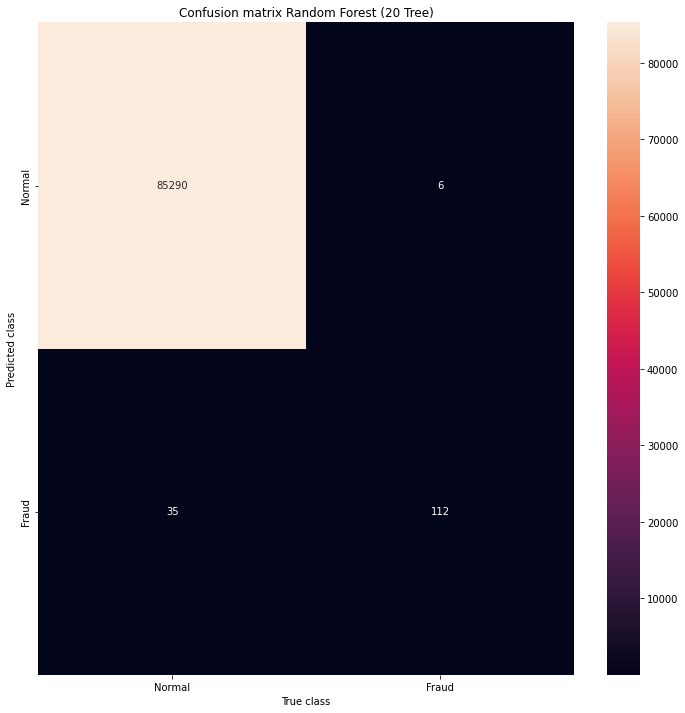

In [20]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Random Forest (20 Tree)") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

In [21]:
'''StandardScaler adalah teknik normalisasi data pada machine learning 
yang mengubah distribusi data menjadi memiliki nilai rata-rata 0 dan deviasi 
standar 1. Tujuannya adalah untuk menghilangkan efek dari skala yang 
berbeda-beda pada setiap fitur dalam model dan meningkatkan kinerja algoritma 
machine learning.'''

# Define which resampling method and which ML model to use in the pipeline

# Define the pipeline and combine sampling method with the RF model
pipeline = Pipeline([('scaler', StandardScaler()), ('RF', classifier)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, predicted))


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]

score matrics 0.9995201479348805


### Random Forest (30 Tree)

In [22]:
#model_2
classifier = RandomForestClassifier(n_estimators=30,criterion='entropy', max_depth=10, random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   32   115]]

score matrics 0.9995552590615966


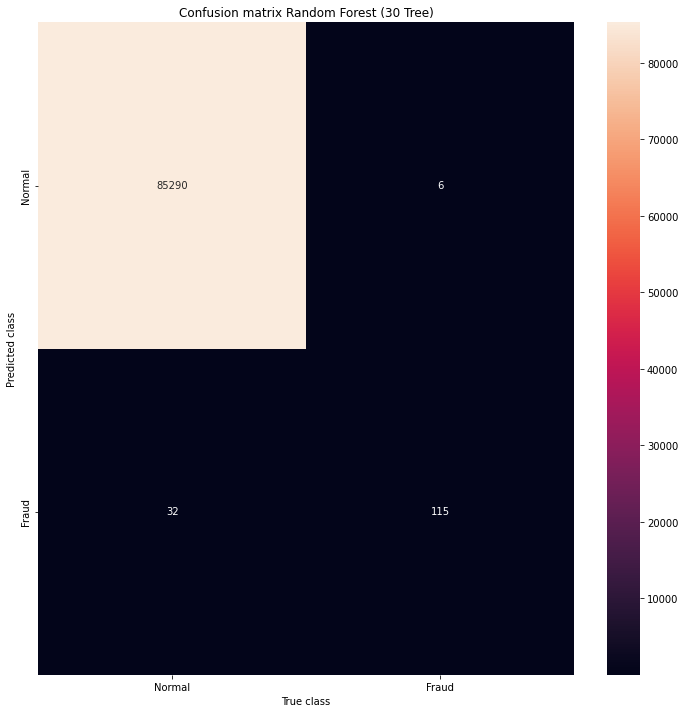

In [25]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Random Forest (30 Tree)") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

In [26]:
'''StandardScaler adalah teknik normalisasi data pada machine learning 
yang mengubah distribusi data menjadi memiliki nilai rata-rata 0 dan deviasi 
standar 1. Tujuannya adalah untuk menghilangkan efek dari skala yang 
berbeda-beda pada setiap fitur dalam model dan meningkatkan kinerja algoritma 
machine learning.'''

# Define which resampling method and which ML model to use in the pipeline

# Define the pipeline and combine sampling method with the RF model
pipeline = Pipeline([('scaler', StandardScaler()), ('RF', classifier)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   32   115]]

score matrics 0.9995552590615966


## SVM

In [27]:
#model_2
classifier = LinearSVC(loss='hinge', C = 2)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2, loss='hinge')

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.61      0.22      0.33       147

    accuracy                           1.00     85443
   macro avg       0.80      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85275    21]
 [  114    33]]

score matrics 0.9984199992977775


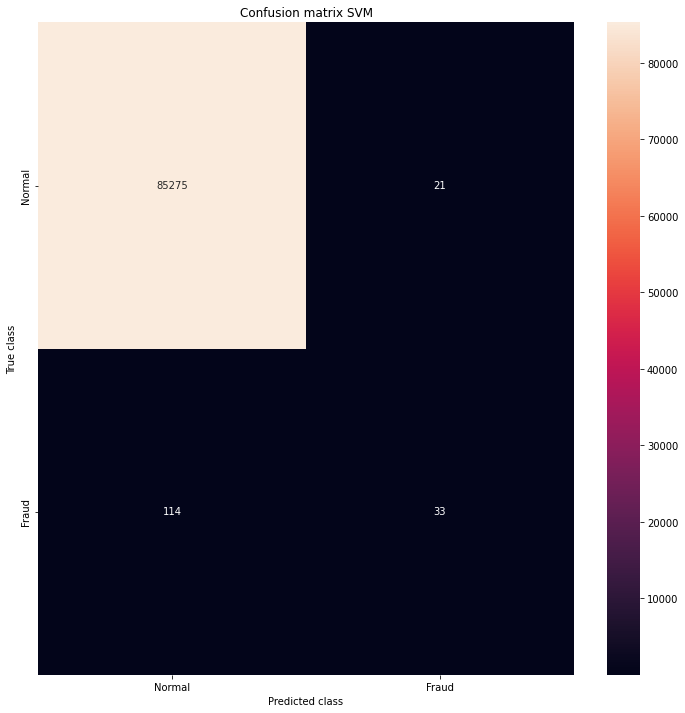

In [30]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix SVM") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [31]:
'''StandardScaler adalah teknik normalisasi data pada machine learning 
yang mengubah distribusi data menjadi memiliki nilai rata-rata 0 dan deviasi 
standar 1. Tujuannya adalah untuk menghilangkan efek dari skala yang 
berbeda-beda pada setiap fitur dalam model dan meningkatkan kinerja algoritma 
machine learning.'''


# Define which resampling method and which ML model to use in the pipeline

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('scaler', StandardScaler()), ('RF', classifier)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, predicted))

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85273    23]
 [   30   117]]

score matrics 0.9993797034280163


## Decision Tree

In [32]:
classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=4)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
y_pred = classifier.predict(x_test)

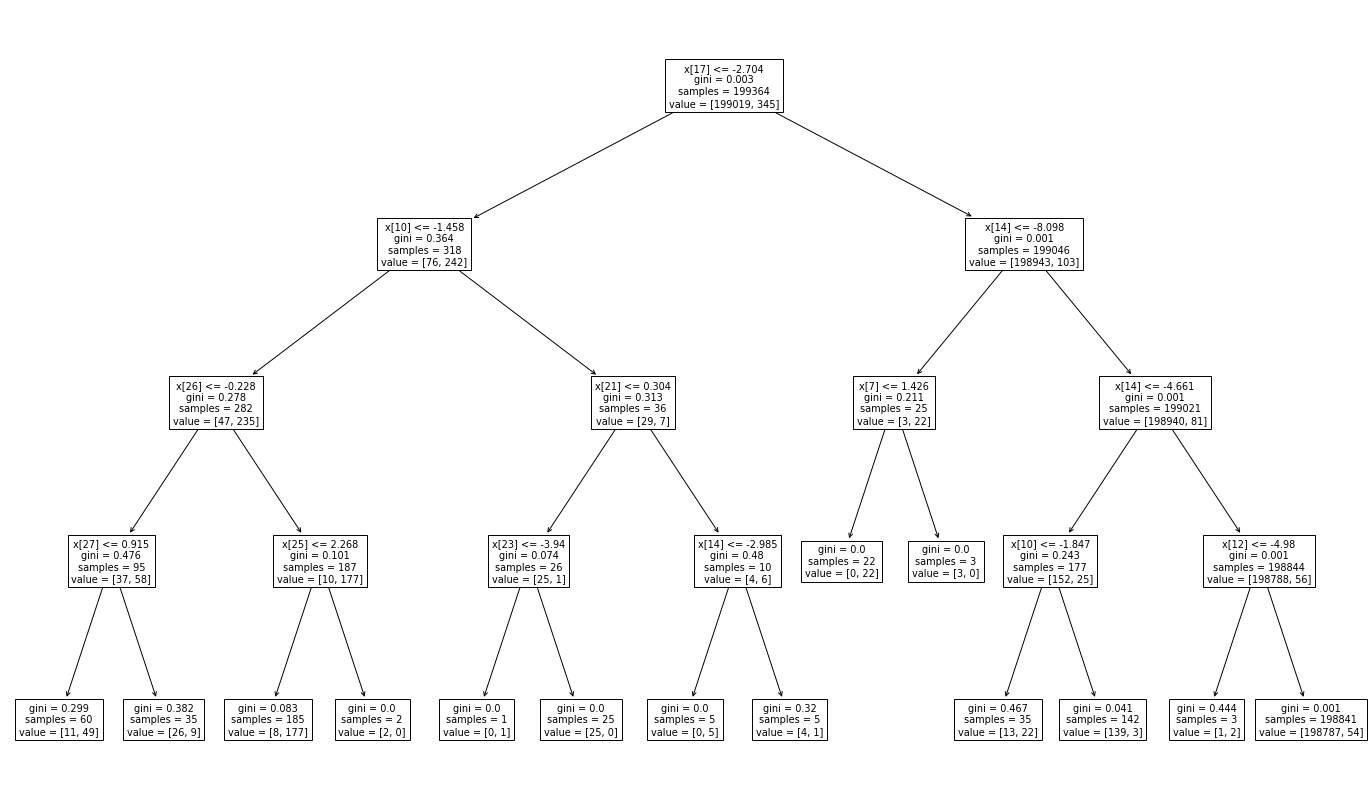

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi']=70
plt.subplots(figsize=(25, 15))
tree.plot_tree(classifier, fontsize=10)
plt.show()

In [35]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.78      0.84       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    13]
 [   32   115]]

score matrics 0.9994733330992591


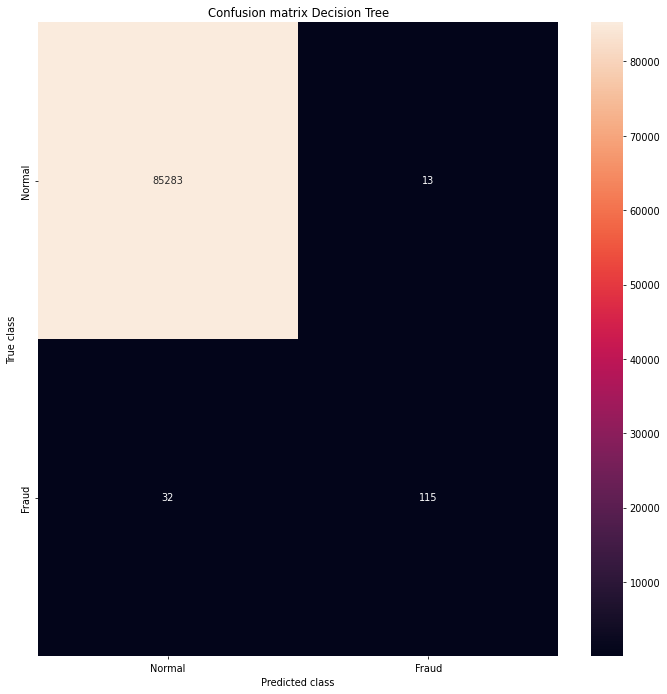

In [36]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Decision Tree") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [37]:
'''StandardScaler adalah teknik normalisasi data pada machine learning 
yang mengubah distribusi data menjadi memiliki nilai rata-rata 0 dan deviasi 
standar 1. Tujuannya adalah untuk menghilangkan efek dari skala yang 
berbeda-beda pada setiap fitur dalam model dan meningkatkan kinerja algoritma 
machine learning.'''


# Define which resampling method and which ML model to use in the pipeline

# Define the pipeline and combine sampling method with the model
pipeline = Pipeline([('scaler', StandardScaler()), ('RF', classifier)])
pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)


# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.78      0.84       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    13]
 [   32   115]]

score matrics 0.9994733330992591


Kesimpulan

Random Forest > D3 > SVM

1. Random Forest
Random forest semakin naik akurasinya saat parameter pohon dinaikkan, namun utk setiap jenis pohon ketika digunakan standar scaler nilai akurasinya sama dengan tanpa standar scaler.

n= 20                                     n=30 
before scl = 0.9995201479348805           before scl = 0.9995552590615966
after scl  = 0.9995201479348805           after scl  = 0.9995552590615966

2. SVM
Akurasi SVM meningkat ketika data telah dinormalisasi menggunakan standar scaler. 
before scl = 0.9964537762016783       
after scl  = 0.9993562960102056

3. D3
before after standar scaler sama saja, tidak ada perubahan.
before scl = 0.9994733330992591         
after scl  = 0.9994733330992591